In [1]:
# IMPORTS
from __future__ import print_function
from obspy import read
import obspy.clients.fdsn
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from obspy import read_events
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector
from obspy.signal.cross_correlation import correlate
import numpy as np
import obspy
from obspy.signal.cross_correlation import xcorr_pick_correction
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import pandas as pd

In [2]:
array_params = {}
array_params['minlat'] = 38.7541 #only use stations within this box
array_params['maxlat'] = 41.6248
array_params['minlon'] = -106
array_params['maxlon'] = -102.8983
array_params['network'] = "TA" #only use these networks
array_params['starttime'] = UTCDateTime("2008-12-07")
array_params['endtime'] = UTCDateTime("2010-05-03")
array_params['fs'] = 50 #resample all traces to this frequency
array_params['tlen'] = 50

events_params = {}
# events_params['minlat'] = 34.994 #only use events within this box
# events_params['maxlat'] = 44.9814
# events_params['minlon'] = -113.9836
# events_params['maxlon'] = -98.284


events_params['minlat'] = 26 #only use events within this box
events_params['maxlat'] = 49
events_params['minlon'] = -125
events_params['maxlon'] = -90

events_params['minmag'] = 5.5 #only events with this magnitude or greater
events_params['events_start'] = array_params['starttime'] #only events within this time window
events_params['events_end'] = array_params['endtime']

# maybe I will need this at some point...
boulder_lat = 40.0150
boulder_lon = -105.2705

-------S T A T I O N    C A T A L O G-------
-------O24A IS LOCATED IN BOULDER-------


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Inventory created at 2021-09-29T22:35:59.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.47
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2008-12-07...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			TA
		Stations (20):
			TA.M23A (Laramie, WY, USA)
			TA.M24A (Cheyenne, WY, USA)
			TA.M25A (Palm-Egli Farm, Albin, WY, USA)
			TA.M26A (McRoberts Ranch, Bridgeport, NE, USA)
			TA.N23A (Red Feather Lakes, CO, USA)
			TA.N24A (Carr, CO, USA)
			TA.N25A (Grover, CO, USA)
			TA.N26A (Koester Ranch, Padroni, CO, USA)
			TA.O23A (Lake Granby, Granby, CO, USA)
			TA.O24A (Longmont, CO, USA)
			TA.O25A (Wiggins, CO, USA)
			TA.O26A (Horse Wrangler Ranch, Akron, CO, USA)
			TA.P23A (Jefferson, CO, USA)
			TA.P24A (Kohler Place, Littleton, CO, USA)
			TA.P25A (Willow Gulch Bison Ranch, Deer Trail, CO, USA)
			TA.P26A (Davis Ranch, Arriba, CO, USA)
			TA.Q23A (Hartsel, CO, USA)
			TA.Q24A (Divide, CO, USA)
			TA.Q25A (Bedland, Calhan, CO

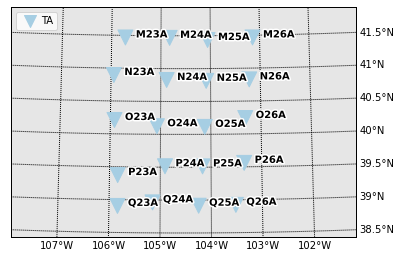

In [3]:
print('-------S T A T I O N    C A T A L O G-------')
print('-------O24A IS LOCATED IN BOULDER-------')
client = Client("IRIS")
array_inventory = client.get_stations(network=array_params['network'], minlatitude=array_params['minlat'],maxlatitude=array_params['maxlat'],minlongitude=array_params['minlon'],maxlongitude=array_params['maxlon'],endtime=array_params['endtime'],starttime=array_params['starttime'])
array_inventory.plot(projection="local",color_per_network=True,show=False)
array_params['inventory'] = array_inventory
array_inventory

-------E V E N T    C A T A L O G-------


/Users/charlesh/opt/anaconda3/envs/ObsPy_Base/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/charlesh/opt/anaconda3/envs/ObsPy_Base/lib/python3.6/site-packages/obspy/imaging/maps.py:305: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  ticks=locator, format=formatter, **cb_kwargs)


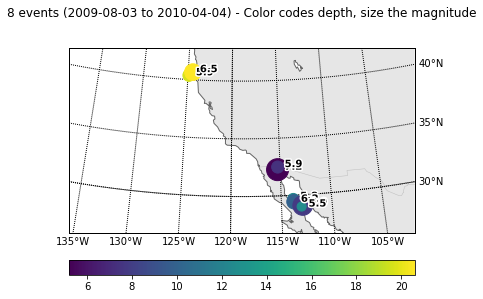

8 Event(s) in Catalog:
2010-04-04T22:40:43.650000Z | +32.276, -115.263 | 7.2 MW
2010-02-04T20:20:22.890000Z | +40.369, -124.894 | 5.9 MW
2010-01-10T00:27:41.850000Z | +40.665, -124.467 | 6.5 MW
2009-12-30T18:48:58.610000Z | +32.504, -115.239 | 5.9 MW
2009-08-05T09:13:12.940000Z | +29.668, -113.812 | 5.8 MW
2009-08-03T18:40:49.910000Z | +29.434, -113.756 | 6.2 MW
2009-08-03T17:59:56.390000Z | +29.070, -112.914 | 6.9 MW
2009-08-03T17:55:23.080000Z | +28.982, -113.025 | 5.5 mb

In [4]:
print('-------E V E N T    C A T A L O G-------')

event_catalog = client.get_events(starttime=events_params['events_start'], endtime=events_params['events_end'],minmagnitude=events_params['minmag'],minlatitude=events_params['minlat'],maxlatitude=events_params['maxlat'],minlongitude=events_params['minlon'],maxlongitude=events_params['maxlon'])
event_catalog.plot(projection='local')
events_params['catalog'] = event_catalog
event_catalog

2009-08-03T17:59:56.390000Z
TA M23A


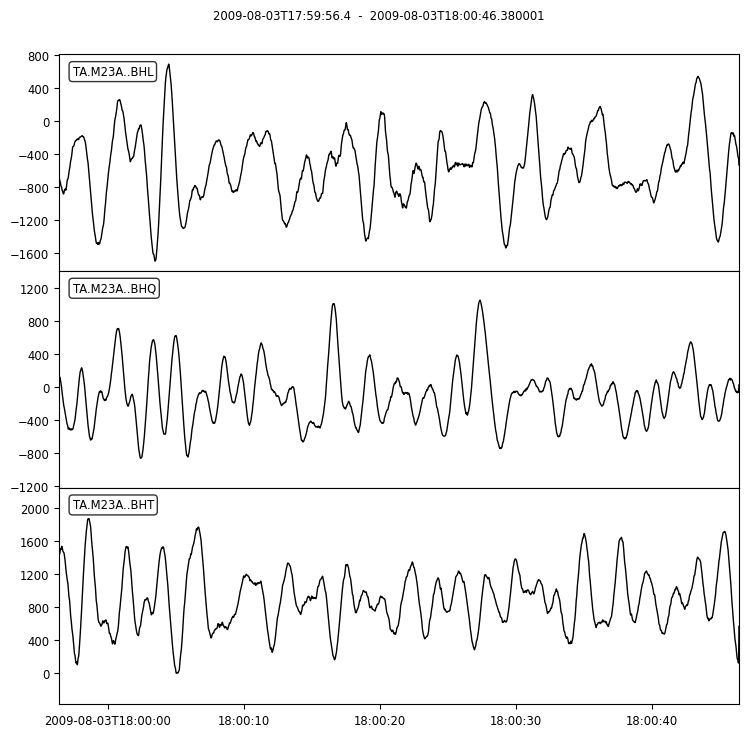

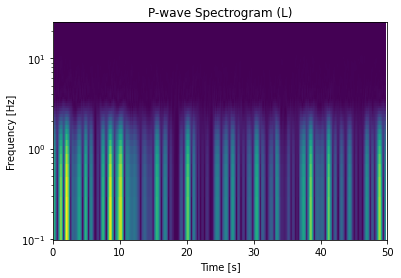

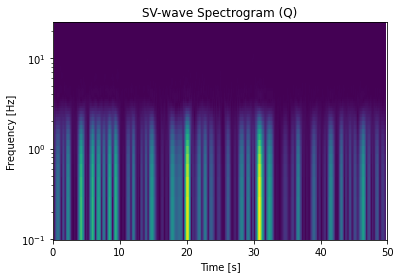

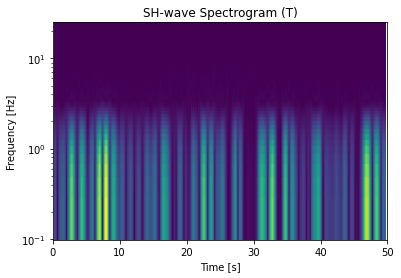

Event:	2009-08-03T17:59:56.390000Z | +29.070, -112.914 | 6.9 MW

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=2872449")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=4982393")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=22415734")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

In [5]:
traces = []
event_k = 6 #33=m6.9

net_k = 0 #0=TA
sta_k = 0 #0=M23A #19=Q26A

event_origin = events_params['catalog'][event_k].origins[0].time
sta = array_params['inventory'][net_k][sta_k].code
net = array_params['inventory'][net_k].code
print(event_origin)
print(net,sta)
t1 = event_origin
t2 = event_origin + array_params['tlen']
st = client.get_waveforms(net, sta, "*", "BH?", t1, t2)

st.resample(array_params['fs'])

source_lla = [events_params['catalog'][event_k].origins[0].latitude,events_params['catalog'][event_k].origins[0].longitude]
receiver_lla = [array_params['inventory'][net_k][sta_k].latitude,array_params['inventory'][net_k][sta_k].longitude]

rotate_on = True
if rotate_on:
    dst,az,ba = obspy.geodetics.base.gps2dist_azimuth(float(source_lla[0]),float(source_lla[1]),float(receiver_lla[0]),float(receiver_lla[1]))
    dz = float(0)
    dx = dst
    if dz==float(0):
        inc = 90
    else:
        inc = np.arctan(dx/dz)
    method = 'ZNE->LQT'
    # L,Q,T = obspy.signal.rotate.rotate_zne_lqt(z,n,e,ba,inc)
    st.rotate(method,ba,inc,st)

st.plot()

st[0].spectrogram(log=True,title='P-wave Spectrogram (L)')
st[1].spectrogram(log=True,title='SV-wave Spectrogram (Q)')
st[2].spectrogram(log=True,title='SH-wave Spectrogram (T)')


source_inventory = array_params['inventory'][net_k][sta_k]
source_trace = st
events_params['catalog'][event_k]

2009-08-03T17:59:56.390000Z
TA M23A
2009-08-03T17:59:56.390000Z
TA M24A
2009-08-03T17:59:56.390000Z
TA M25A
2009-08-03T17:59:56.390000Z
TA M26A
2009-08-03T17:59:56.390000Z
TA N23A
2009-08-03T17:59:56.390000Z
TA N24A
2009-08-03T17:59:56.390000Z
TA N25A
2009-08-03T17:59:56.390000Z
TA N26A
2009-08-03T17:59:56.390000Z
TA O23A
2009-08-03T17:59:56.390000Z
TA O24A
2009-08-03T17:59:56.390000Z
TA O25A
2009-08-03T17:59:56.390000Z
TA O26A
2009-08-03T17:59:56.390000Z
TA P23A
2009-08-03T17:59:56.390000Z
TA P24A
2009-08-03T17:59:56.390000Z
TA P25A
2009-08-03T17:59:56.390000Z
TA P26A
2009-08-03T17:59:56.390000Z
TA Q23A
2009-08-03T17:59:56.390000Z
TA Q24A
2009-08-03T17:59:56.390000Z
TA Q25A
2009-08-03T17:59:56.390000Z
TA Q26A


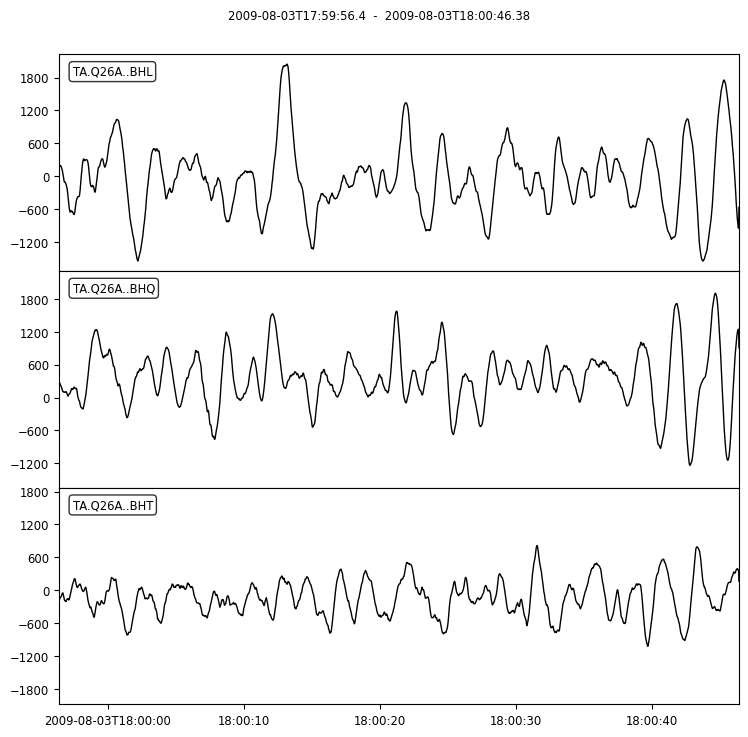

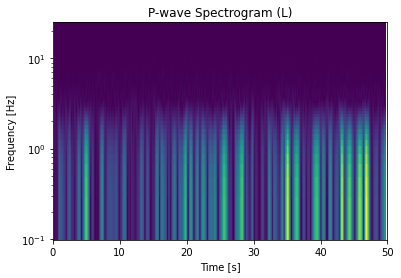

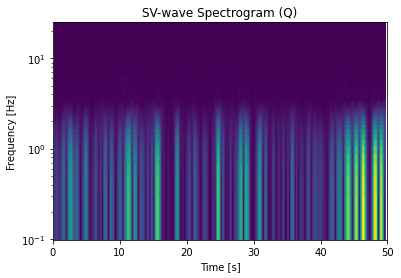

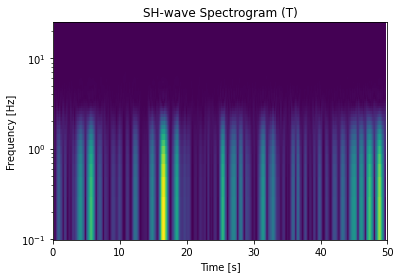

Event:	2009-08-03T17:59:56.390000Z | +29.070, -112.914 | 6.9 MW

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=2872449")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=4982393")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=22415734")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

In [6]:

receiver_inventory = []
receiver_trace = []
event_k = 6 #33=m6.9
sta_k = 19 #0=M23A #19=Q26A
net_k = 0 #0=TA
for sta_k in range(len(array_params['inventory'][net_k])):

    event_origin = events_params['catalog'][event_k].origins[0].time
    sta = array_params['inventory'][net_k][sta_k].code
    net = array_params['inventory'][net_k].code
    print(event_origin)
    print(net,sta)
    t1 = event_origin
    t2 = event_origin + array_params['tlen']
    st = client.get_waveforms(net, sta, "*", "BH?", t1, t2)

    st.resample(array_params['fs'])

    source_lla = [events_params['catalog'][event_k].origins[0].latitude,events_params['catalog'][event_k].origins[0].longitude]
    receiver_lla = [array_params['inventory'][net_k][sta_k].latitude,array_params['inventory'][net_k][sta_k].longitude]

    rotate_on = True
    if rotate_on:
        dst,az,ba = obspy.geodetics.base.gps2dist_azimuth(float(source_lla[0]),float(source_lla[1]),float(receiver_lla[0]),float(receiver_lla[1]))
        dz = float(0)
        dx = dst
        if dz==float(0):
            inc = 90
        else:
            inc = np.arctan(dx/dz)
        method = 'ZNE->LQT'
        # L,Q,T = obspy.signal.rotate.rotate_zne_lqt(z,n,e,ba,inc)
        st.rotate(method,ba,inc,st)
    receiver_inventory.append(array_params['inventory'][net_k][sta_k])
    receiver_trace.append(st)

st.plot()

st[0].spectrogram(log=True,title='P-wave Spectrogram (L)')
st[1].spectrogram(log=True,title='SV-wave Spectrogram (Q)')
st[2].spectrogram(log=True,title='SH-wave Spectrogram (T)')
events_params['catalog'][event_k]

In [7]:
A = source_trace.select(component='L')[0]
print(A)

TA.M23A..BHL | 2009-08-03T17:59:56.400001Z - 2009-08-03T18:00:46.380001Z | 50.0 Hz, 2500 samples


TA.M23A..BHL | 2009-08-03T17:59:56.400001Z - 2009-08-03T18:00:46.380001Z | 50.0 Hz, 2500 samples
TA.M24A..BHL | 2009-08-03T17:59:56.399998Z - 2009-08-03T18:00:46.379998Z | 50.0 Hz, 2500 samples
TA.M25A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.M26A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.N23A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.N24A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.N25A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.N26A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.O23A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.O24A..BHL | 2009-08-03T17:59:56.400000Z - 2009-08-03T18:00:46.380000Z | 50.0 Hz, 2500 samples
TA.O25A..BHL | 2009-08-03T17:5

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


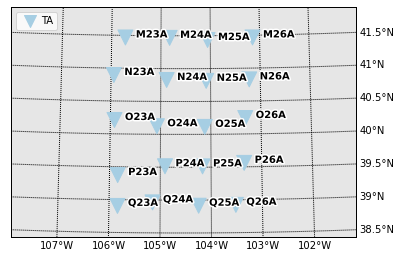

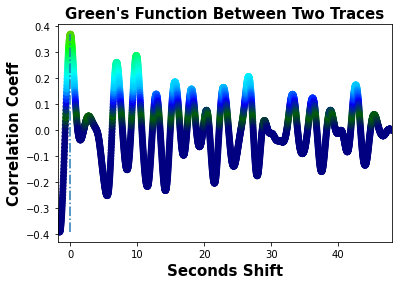

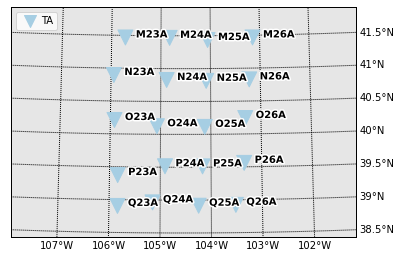

In [8]:

cc_vec = []

for kk in range(len(receiver_trace)):
    B = receiver_trace[kk].select(component='L')[0]
    print(B)
    a = A
    b = B
    Lshift = len(a)
    cc = correlate(a, b, Lshift)
    cc = cc[0:Lshift]
    cc = np.flip(cc)
    cc_vec.append(cc)
impulse_sample = np.argmax(cc)
x = (np.linspace(0,len(cc),len(cc)) - impulse_sample)/array_params['fs']
plt.scatter(x,cc,color=plt.cm.gist_ncar(cc))
plt.plot([0,0],[np.min(cc),np.max(cc)],'-.')
plt.xlabel('Seconds Shift',fontweight='bold',fontsize=15)
plt.ylabel('Correlation Coeff',fontweight='bold',fontsize=15)
plt.title('''Green's''' + ' Function Between Two Traces',fontweight='bold',fontsize=15)
plt.xlim(np.min(x),np.max(x))

array_inventory.plot(projection="local",color_per_network=True,show=False)

In [9]:
print('---------DATA STATISTICS:')
n_events = len(events_params['catalog'])
n_stations = len(array_params['inventory'][net_k])
n_permute = int(sc.special.comb(len(array_params['inventory'][net_k]),2))
n_train = int(n_permute*n_events)
print('| EVENTS: ' + str(n_events))
print('| STATIONS: ' + str(n_stations))
print('| PERMUTATIONS PER EVENT: ' + str(n_permute))
print('| TOTAL SIZE OF TRAINING SET: ' + str(n_train))

---------DATA STATISTICS:
| EVENTS: 8
| STATIONS: 20
| PERMUTATIONS PER EVENT: 190
| TOTAL SIZE OF TRAINING SET: 1520


(array([ 38.5,  39. ,  39.5,  40. ,  40.5,  41. ,  41.5,  42. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

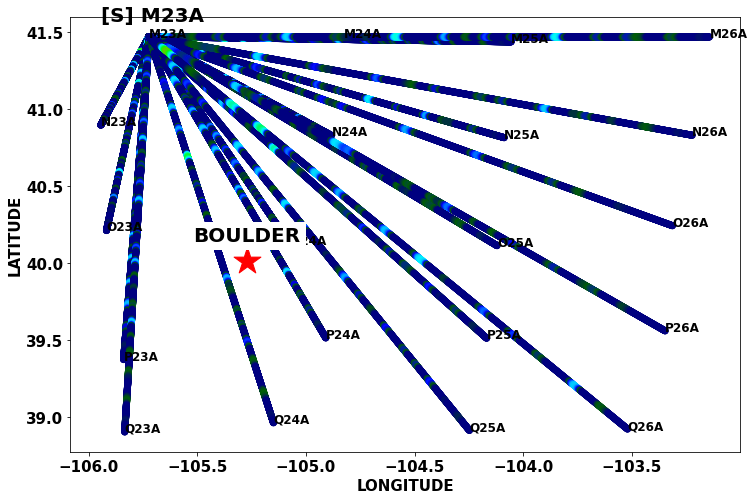

In [10]:
fig = plt.figure(figsize=(12,8))

plt.text(source_inventory.longitude,source_inventory.latitude + 0.1,' [S] ' + source_inventory.code,fontweight='bold',fontsize=20,horizontalalignment='center')

for kk in range(len(receiver_inventory)):
    cc = cc_vec[kk]
    xlon = np.linspace(source_inventory.longitude,receiver_inventory[kk].longitude,len(cc))
    xlat = np.linspace(source_inventory.latitude,receiver_inventory[kk].latitude,len(cc))
    plt.text(receiver_inventory[kk].longitude,receiver_inventory[kk].latitude,receiver_inventory[kk].code,fontweight='bold',fontsize=12)
    plt.scatter(xlon,xlat,c=plt.cm.gist_ncar(cc))
plt.text(boulder_lon,boulder_lat+0.1,'BOULDER',fontweight='bold',fontsize=20,horizontalalignment='center',verticalalignment='bottom',backgroundcolor='w')
plt.scatter(boulder_lon,boulder_lat,marker='*',s=800,c='r')
plt.xlabel('LONGITUDE',fontweight='bold',fontsize=15)
plt.ylabel('LATITUDE',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold',fontsize=15)

In [11]:

CC_VEC = []

Lat_src = []
Lon_src = []
Lat_rec = []
Lon_rec = []
REC_CODE = []
SRC_CODE = []

Event_num = []
src_k = 0
rec_k = 1
for rec_k in range(len(array_params['inventory'][net_k])):
    for src_k in range(len(array_params['inventory'][net_k])):
        if int(rec_k)!=int(src_k):

            rec_lat = array_params['inventory'][net_k][rec_k].latitude
            rec_lon = array_params['inventory'][net_k][rec_k].longitude
            src_lat = array_params['inventory'][net_k][src_k].latitude
            src_lon = array_params['inventory'][net_k][src_k].longitude

            Lat_src.append(src_lat)
            Lon_src.append(src_lon)
            Lat_rec.append(rec_lat)
            Lon_rec.append(rec_lon)


            A = receiver_trace[src_k].select(component='L')[0]
            B = receiver_trace[rec_k].select(component='L')[0]
            Lshift = len(A)
            cc = correlate(A, B, Lshift)
            cc = cc[0:Lshift]
            cc = np.flip(cc)

            rec_code = receiver_inventory[rec_k].code
            src_code = receiver_inventory[src_k].code

            REC_CODE.append(rec_code)
            SRC_CODE.append(src_code)
            CC_VEC.append(cc)

            Event_num.append(event_k)
print(np.shape(Lon_src))
print(np.shape(CC_VEC))

(380,)
(380, 2500)


In [12]:


d= {"Lat_src": Lat_src, "Lon_src": Lon_src, "Lat_rec": Lat_rec, "Lon_rec": Lon_rec,"Greens":CC_VEC,"Name_src":SRC_CODE,"Name_rec":REC_CODE,"Event_num":Event_num}
df = pd.DataFrame(d)
df.head(380)

,Lat_src,Lon_src,Lat_rec,Lon_rec,Greens,Name_src,Name_rec,Event_num
0,41.467602,-104.824799,41.467999,-105.722099,"[0.128344434441, 0.128796354764, 0.12874834942...",M24A,M23A,6
1,41.434700,-104.055099,41.467999,-105.722099,"[0.154178659182, 0.15256275651, 0.151179637956...",M25A,M23A,6
2,41.466099,-103.142700,41.467999,-105.722099,"[-0.272107318898, -0.267784034178, -0.26312246...",M26A,M23A,6
3,40.894699,-105.944000,41.467999,-105.722099,"[0.0633291803589, 0.0658792427136, 0.068421755...",N23A,M23A,6
4,40.827099,-104.882401,41.467999,-105.722099,"[0.0799129828139, 0.0668518871088, 0.053736139...",N24A,M23A,6
...,...,...,...,...,...,...,...,...
375,39.512501,-104.167999,38.923401,-103.519501,"[-0.0520441417172, -0.0584936443926, -0.064587...",P25A,Q26A,6
376,39.560200,-103.346497,38.923401,-103.519501,"[0.0667402678326, 0.0661563441556, 0.065647422...",P26A,Q26A,6
377,38.904499,-105.833702,38.923401,-103.519501,"[-0.118052495448, -0.113282745096, -0.10842098...",Q23A,Q26A,6
378,38.964100,-105.149200,38.923401,-103.519501,"[-0.235497197312, -0.233003846683, -0.23018301...",Q24A,Q26A,6


In [13]:
# ----------- ----------- ----------- ----------- -----------
# ----------- ----------- ----------- ----------- -----------
#  BETA CODE BELOW HERE
# ----------- ----------- ----------- ----------- -----------
# ----------- ----------- ----------- ----------- -----------

In [14]:
def get_synthetic(source_lat=None,source_lon=None,sourceforce=None,source_depth=None,receiver_lat=None,receiver_lon=None,origin_start=None,trace_starttime=None,trace_endtime=None,velocity_model=None):
    filter_on = True
    plot_on = True
    Bpass = [0.2, 0.999]

    source_lat = np.atleast_2d(np.asarray(source_lat))
    source_lon = np.atleast_2d(np.asarray(source_lon))
    sourceforce = sourceforce
    source_depth = source_depth
    receiver_lat = np.atleast_2d(np.asarray(receiver_lat))
    receiver_lon = np.atleast_2d(np.asarray(receiver_lon))
    origin_start = np.atleast_2d(np.asarray(origin_start))
    trace_starttime = np.atleast_2d(np.asarray(trace_starttime))
    trace_endtime = np.atleast_2d(np.asarray(trace_endtime))
    velocity_model = velocity_model

    units = "velocity"
    dt = 0.001
    traces = []
    Mrows,Ncols = np.shape(np.atleast_2d(np.asarray(source_lat)))

    if Mrows>1:
        plot_on = False

    from obspy import read, read_inventory
    inv = read_inventory()
    for M in range(Mrows):
        params = [source_lat[M],source_lon[M],sourceforce,source_depth,receiver_lat[M],receiver_lon[M],origin_start[M],trace_starttime[M],trace_endtime[M],velocity_model]
        if any(elem is None for elem in params):
            print('MISSING PARAMETERS. Deferring to defaults!')
            # source_lat[M] = "39.999758"
            # source_lon[M] = "-105.262344"
            source_lat[M] = "40.063946"
            source_lon[M] = "-105.278155"
            sourceforce = "1e22,0,0"
            source_depth = "1000"
            receiver_lat[M] = "40.006724"
            receiver_lon[M] = "-105.263690"
            origin_start[M] = "2021-09-08T13:19:00"
            trace_starttime[M] = "2021-09-08T13:18:30"
            trace_endtime[M] = "2021-09-08T13:20:00"
            velocity_model = "iasp91_2s"
            components = "ZNE"
            print("Source LLA: " + str(source_lat[M].tolist()[0]) + "," + str(source_lon[M].tolist()[0]) + "\nSource Force: " + str(sourceforce) + "\nSource depth: " + str(source_depth) + "\nReceiver LLA: " + str(receiver_lat[M].tolist()[0]) + "," + str(receiver_lon[M].tolist()[0]) + "\nSource Origin Time: " + str(origin_start[M].tolist()[0]) + "\nTrace Start-End: " + (trace_starttime[M].tolist()[0]) + "," + str(trace_endtime[M].tolist()[0]) + "\nVelocity Model" + str(velocity_model))
        dst,az,ba = obspy.geodetics.base.gps2dist_azimuth(float(source_lat[M]),float(source_lon[M]),float(receiver_lat[M]),float(receiver_lon[M]))
        dist_deg = obspy.geodetics.base.kilometer2degrees(dst/1000)
        mseed = "http://service.iris.edu/irisws/syngine/1/query?model=" + str(velocity_model) + "&format=miniseed&components=" + str(components) + "&units=" + units + "&origintime=" + str(origin_start[M].tolist()[0]) + "&starttime="  + str(trace_starttime[M].tolist()[0]) + "&endtime="  + str(trace_endtime[M].tolist()[0]) + "&receiverlatitude="  + str(receiver_lat[M].tolist()[0]) + "&receiverlongitude="  + str(receiver_lon[M].tolist()[0]) + "&sourcelatitude="  + str(source_lat[M].tolist()[0]) + "&sourcelongitude="  + str(source_lon[M].tolist()[0]) + "&sourcedepthinmeters="  + str(source_depth) + "&sourceforce=" + sourceforce + "&nodata=404"
        # mseed = "http://service.iris.edu/irisws/syngine/1/query?model=" + str(velocity_model) + "&format=miniseed&components=ZNE&units=" + units + "&dt=" + str(dt) + "&origintime=" + str(origin_start[M].tolist()[0]) + "&starttime=" + str(trace_starttime[M].tolist()[0]) + "&endtime=" + str(trace_endtime[M].tolist()[0]) + "&receiverlatitude=" + str(receiver_lat[M].tolist()[0]) + "&receiverlongitude=" + str(receiver_lon[M].tolist()[0]) + "&sourcelatitude=" + str(source_lat[M].tolist()[0]) + "&sourcelongitude=" + str(source_lon[M].tolist()[0]) + "&sourcedepthinmeters=" + str(source_depth) + '&sourceforce=' + str(sourceforce) + "&nodata=404"
        # print(mseed)
        template = read(mseed)
        if filter_on:
            # filter trace
            template.filter("bandpass", freqmin=Bpass[0], freqmax=Bpass[1])
        rotate_on = True
        if rotate_on:
            dst,az,ba = obspy.geodetics.base.gps2dist_azimuth(float(source_lat[M]),float(source_lon[M]),float(receiver_lat[M]),float(receiver_lon[M]))
            dz = float(0)
            dx = dst
            if dz==float(0):
                inc = 90
            else:
                inc = np.arctan(dx/dz)
            method = 'ZNE->LQT'
            # L,Q,T = obspy.signal.rotate.rotate_zne_lqt(z,n,e,ba,inc)
            template.rotate(method,ba,inc,inv)


        traces.append(template)
        traces = template


        if plot_on:
            # plot
            template.plot()
    return traces
